In [1]:
import pandas as pd
import numpy as np
from ProgSnap2 import ProgSnap2Dataset
from ProgSnap2 import PS2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import os
from os import path

In [2]:
PATH = "data/CodeWorkout/"

s19_ps2 = ProgSnap2Dataset(PATH + 'S19')
f19_ps2 = ProgSnap2Dataset(PATH + 'F19')

s19 = s19_ps2.get_main_table()
f19 = f19_ps2.get_main_table()

In [3]:
s19_problems = set(s19[PS2.ProblemID].unique())
f19_problems = set(f19[PS2.ProblemID].unique())

In [8]:
np.sort(s19[PS2.AssignmentID].unique())

array([439., 487., 492., 494., 502.])

In [9]:
np.sort(f19[PS2.AssignmentID].unique())

array([597, 600, 609, 615, 622, 631], dtype=int64)

In [4]:
# 48 problems the same
len(s19_problems.intersection(f19_problems))

48

In [26]:
# Problems 45 and 48 were dropped (from assignment 5)
dropped_problems = s19_problems.difference(f19_problems)
dropped_problems

{45, 48}

In [8]:
# 12 problems were added
added_problems = f19_problems.difference(s19_problems)
added_problems

{30, 171, 241, 242, 243, 244, 245, 246, 254, 255, 736, 737}

In [10]:
# 10 Were added to a new assignment and 2 replace the old problems in assignment 5
f19[f19[PS2.ProblemID].isin(added_problems)][[PS2.AssignmentID, PS2.ProblemID]].drop_duplicates()

,AssignmentID,ProblemID
73845,622,241
73862,622,171
73880,622,30
73900,622,244
73904,622,245
73912,622,246
73922,622,254
73927,622,255
73973,622,242
74023,622,243


In [18]:
def time_stats(df):
    df = df.copy()
    df['TimeInt'] = pd.to_datetime(df[PS2.ServerTimestamp]).apply(lambda x: x.value)
    med_time = df.groupby([PS2.AssignmentID, PS2.ProblemID])['TimeInt'].apply(lambda x: np.median(x))
    # df = df.merge(med_time.to_frame('MedTime'), on=[PS2.AssignmentID, PS2.ProblemID])
    return med_time.reset_index().sort_values('TimeInt')

s19_times = time_stats(s19)
f19_times = time_stats(f19)

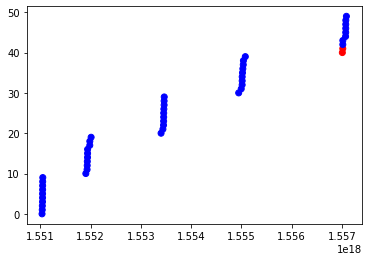

In [27]:
y = range(0, len(s19_times.index))
colors = s19_times[PS2.ProblemID].isin(dropped_problems).apply(lambda x: 'red' if x else 'blue')
plt.scatter(s19_times['TimeInt'], y, color=colors)

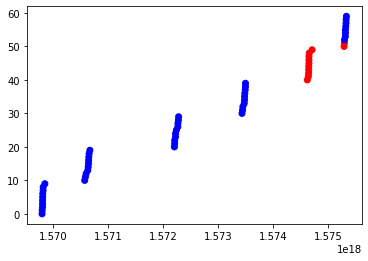

In [29]:
# The added assignment comes between 4 and 5 in spring
# We could just skip this assignment for F19->S19 prediction...
y = range(0, len(f19_times.index))
colors = f19_times[PS2.ProblemID].isin(added_problems).apply(lambda x: 'red' if x else 'blue')
plt.scatter(f19_times['TimeInt'], y, color=colors)

S19 Problem 45 == F19 Problem 736

S19 Problem 48 == f19 Problem 737

In [48]:
def print_code_samples(df, ps2, problem_id, n_samples):
    code_states = df[(df[PS2.ProblemID] == problem_id) & (df[PS2.EventType] == 'Run.Program') & (df[PS2.Score] == 1)].sample(n_samples)[PS2.CodeStateID]
    solutions = code_states.apply(lambda cs_id: ps2.get_code_for_id(cs_id))
    for sol in solutions:
        print(sol)

In [44]:
print_code_samples(s19, s19_ps2, 45, 1)

public int sum67(int[] nums)
{
    int sum = 0;
    int change = 0;
    for(int i = 0; i < nums.length ; i++)
    {
        if(nums[i] == 6)
        {
            for(int c = i; c < nums.length ; c++)
            {
                if(nums[c] == 7)
                {
                    change = c + 1;
                    break;
                }
            }
        }
        if(nums[i] == 6)
            i = change;
        if(i < nums.length)
        {
        	sum = sum + nums[i];
        }
    }
    return sum;
}



In [45]:
print_code_samples(s19, s19_ps2, 48, 1)

public int[] withoutTen(int[] nums)
{
    int[] newArray = new int[nums.length];
    for(int val : newArray)
        val = 0;
    
    int newIndex = 0;
    for (int i = 0; i < nums.length; i++){
    	if(nums[i] != 10)
            newArray[newIndex++] = nums[i]; 
    }
    
    return newArray;
}



In [49]:
print_code_samples(f19, f19_ps2, 736, 1)

public int sum67(int[] nums)
{
    boolean deadZone = false;
    if (nums.length > 0)
    {
        int sum = 0;
        for (int i = 0; i < nums.length; i++)
        {
            if (nums[i] == 6)
            {
                deadZone = true;
            }
            
            if (deadZone == false)
            {
            	sum += nums[i];
            }
            
            if (nums[i] == 7)
            {
                deadZone = false;
            }
        }
        return sum;
    }
    else
    {
        return 0;
    }
}



In [50]:
print_code_samples(f19, f19_ps2, 737, 1)

public int[] withoutTen(int[] nums)
{
    int[] r = new int[nums.length];
	int j = 0;
	for(int i = 0; i < nums.length; i++)
	{
		if(nums[i] != 10)
		{
			r[j] = nums[i];
			j++;
		}
	}
	
	return r;
}

